In [60]:
import numpy as np
from numpy import log10
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import filtfilt
from scipy.signal import lfilter
from sklearn.metrics import mean_squared_error

In [61]:
# Load the EEG signal dataset from a CSV file
eeg_data = pd.read_csv('eeg_data.csv')

In [62]:
signal = eeg_data['EEG.AF3'].values

Text(0.5, 1.0, 'Original Signal')

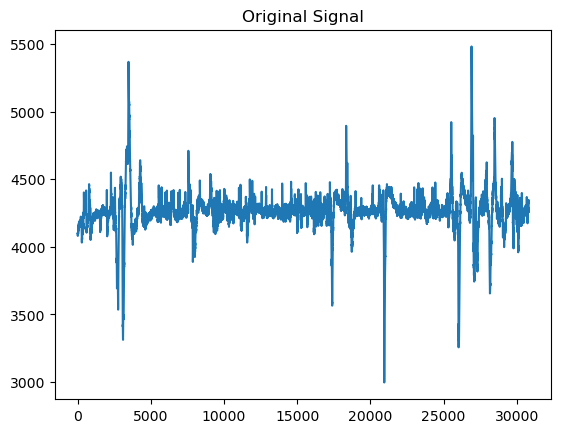

In [63]:
# Plot the noisy signal
plt.figure()
plt.plot(signal)
plt.title('Original Signal')

In [64]:
# Add Poisson noise to the signal
lambda_ = 5  # parameter of the Poisson distribution
noisy_signal = np.random.poisson(lambda_ * np.abs(signal)) * np.sign(signal)

Text(0.5, 1.0, 'Noisy signal')

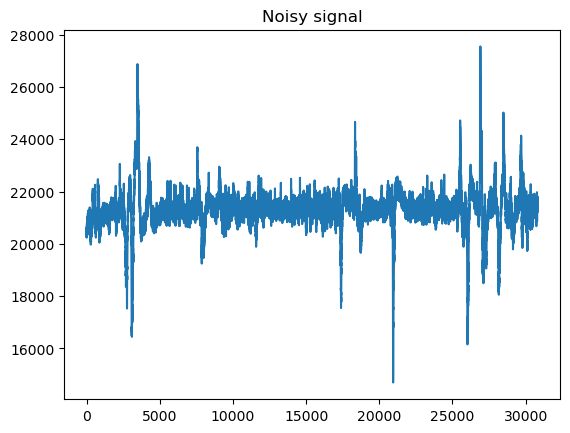

In [65]:
# Plot the noisy signal
plt.figure()
plt.plot(noisy_signal)
plt.title('Noisy signal')

In [66]:
# Define the wavelet and the thresholding method
wavelet = pywt.Wavelet('bior2.6')
mode = pywt.Modes.smooth
threshold = 0.1

# Decompose the noisy signal into wavelet coefficients
coeffs = pywt.wavedec(noisy_signal, wavelet, mode=mode)

# Threshold the detail coefficients
for i in range(1, len(coeffs)):
    coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))

# Reconstruct the denoised signal from the thresholded coefficients
filtered_signal = pywt.waverec(coeffs, wavelet)
filtered_signal = filtered_signal[:len(signal)]

In [67]:
mse = mean_squared_error(noisy_signal, filtered_signal)
psnr = 20 * log10(max(noisy_signal)) - 10 * log10(mse)
snr = 10 * log10(np.sum(noisy_signal**2) / np.sum((noisy_signal - filtered_signal)**2))

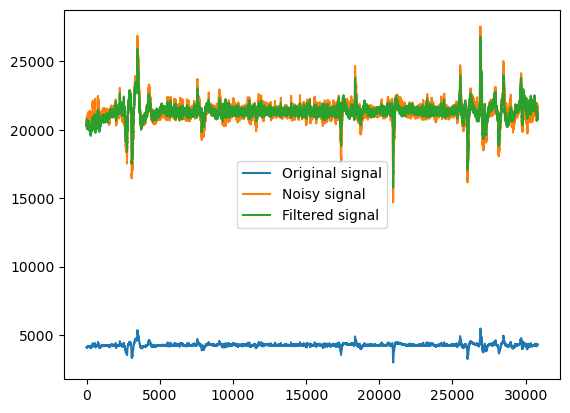

PSNR: 38.812170350534025
MSE: 99747.04790392412
SNR: 36.59167608340518


In [68]:
# Plot the original, noisy, and filtered signals
plt.plot(signal, label='Original signal')
plt.plot(noisy_signal, label='Noisy signal')
plt.plot(filtered_signal, label='Filtered signal')
plt.legend()
plt.show()

# Print the PSNR, MSE, and SNR values
print("PSNR:", psnr)
print("MSE:", mse)
print("SNR:", snr)

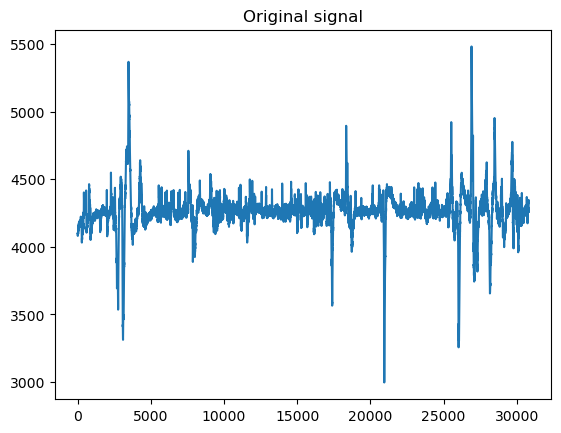

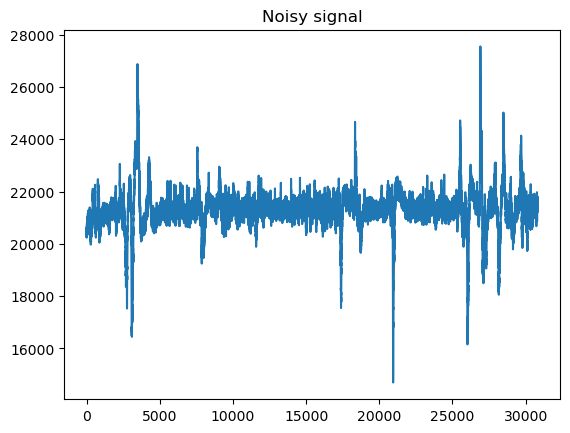

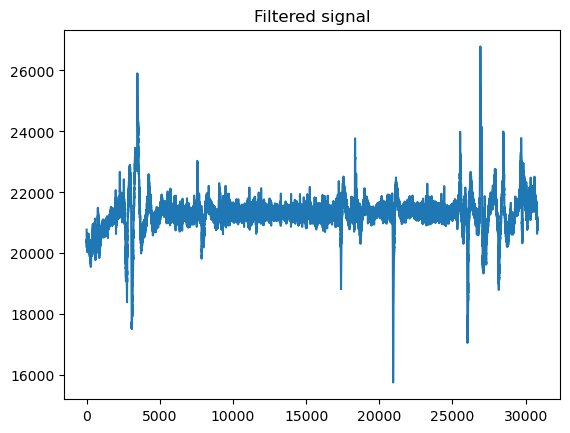

In [69]:
# Plot the original signal
plt.figure()
plt.plot(signal)
plt.title('Original signal')

# Plot the noisy signal
plt.figure()
plt.plot(noisy_signal)
plt.title('Noisy signal')

# Plot the filtered signal
plt.figure()
plt.plot(filtered_signal)
plt.title('Filtered signal')

# Show all the plots
plt.show()